# Семинар 2. Метрические методы классификации и регрессии.

Подключение библиотек. 
$
\newcommand{\R}{\mathbb{R}}
\newcommand{\X}{\mathbb{X}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\E}{\mathbb{E}}
\renewcommand{\Prob}{\mathbb{P}}
\renewcommand{\le}{\leqslant}
\renewcommand{\ge}{\geqslant}
$

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wg

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

# 1. Примеры расстояний

* Расстояние Минковского ($r \ge 1$): $$\rho(x, x') = \left(\sum_{k=1}^n \abs{x_k - x'_k}^r\right)^{1/r}.$$

* Евклидово расстояние ($r = 2$): $$\rho(x, x') = \left(\sum_{k=1}^n \abs{x_k - x'_k}^2\right)^{1/2}.$$

* Манхэттенское расстояние ($r = 1$): $$\rho(x, x') = \sum_{k=1}^n \abs{x_k - x'_k}.$$

* Расстояние Чебышёва ($r = +\infty$): $$\rho(x, x') = \max_{1 \le k \le n} \abs{x_k - x'_k}.$$

__Задача:__ Реализовать функцию, которая возвращает расстояние Минковского между двумя векторами.

* На вход:
    * вектор $x$;
    * вектор $y$;
    * параметр $0 < r < \infty$.
* На выход:
    * расстояние Минковского $r$ между векторами $x$ и $y$

In [2]:
def distance(x, y, r=2):
    # написать код
    return sum(abs(x - y) ** r) ** (1/r)

Рисуем линии уровня для расстояний: 

In [3]:
def plot_distance(r):
    N = 256
    X_list = np.linspace(-1, 1, N)
    Y_list = np.linspace(-1, 1, N)

    X = np.zeros((N, N))
    Y = np.zeros((N, N))
    Z = np.zeros((N, N))

    for i, x in enumerate(X_list):
        for k, y in enumerate(Y_list):
            X[i, k] = x
            Y[i, k] = y
            Z[i, k] = distance(np.array([x, y]), np.array([0, 0]), r)


    plt.figure(figsize=(5, 5))
    plt.contour(X, Y, Z, levels=32)
    plt.title(f'Расстояние Минковского, r={r}')
    plt.show()

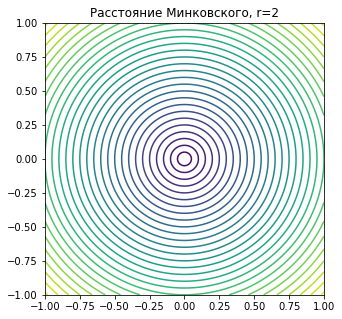

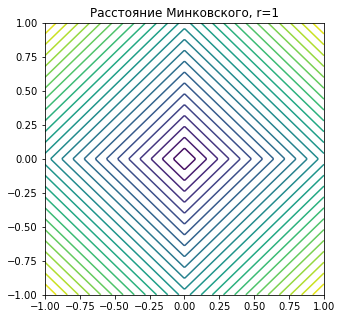

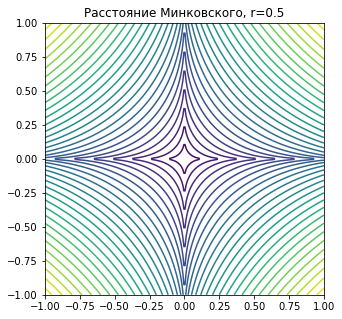

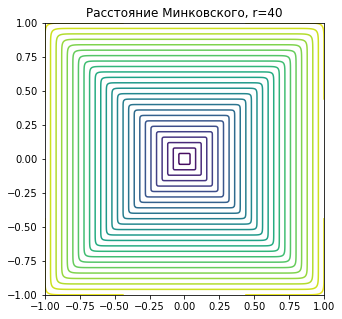

In [5]:
plot_distance(2)
plot_distance(1)
plot_distance(0.5)
plot_distance(40)

Немного [интерактива](https://ipywidgets.readthedocs.io/en/stable/):

In [6]:
output = wg.Output()

def func(r):
    with output:
        output.clear_output(wait=True)
        plot_distance(r)

wg.interact(func,
            r=wg.FloatSlider(min=0.1, max=10, value=2.),
            continuous_update=False)
display(output)

interactive(children=(FloatSlider(value=2.0, description='r', max=10.0, min=0.1), Output()), _dom_classes=('wi…

Output()

## Любопытный факт.

Линии уровня на рисунке называются суперэллипсам: $$ \abs{\frac{x}{a}}^n + \abs{\frac{y}{b}}^n = 1$$

Пример использования: $$ \abs{\frac{x}{60}}^5 + \abs{\frac{y}{60}}^5 = 1$$ -- иконки в iOS! Называется сквиркл: square + circle. Подробнее в [источнике](https://droider.ru/post/iphone-eto-skvirkl-eto-chto-eshhyo-za-zver-16-08-2020/).

# 2. Классификация

## 2.1. Метод $k$ ближайших соседей

Обобщенный метрический классификатор: $$ a(u, \mathbb{X}) = \arg\max\limits_{y \in \mathbb{Y}} \sum\limits_{i=1}^{l} \left[y_{u}^{(i)} = y\right] \cdot w(i, u),$$
где $y_u^{(i)}$ -- $i$-ый сосед объекта $u \in \mathbb{X}$, $w(i, u)$ -- оценка степени важности $i$-го соседа для классификации объекта $u$.

__Метод $k$ ближайших соседей:__
    $$
        w(i, u) = [i \le k], \quad a(u, \X) = \arg\max_{y \in Y} \sum_{i=1}^{k}[y_u^{(i)} = y]
    $$

In [70]:
frame = sns.load_dataset('iris')
frame['species_code'] = LabelEncoder().fit_transform(frame['species'])

print('Число записей:', frame.shape[0])
frame.head()

Число записей: 150


,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


__Задача__ Построить диаграмму рассеяния для `sepal_length` и `petal_length`, раскрасить по цветам в зависимости от целевой переменной `species`.

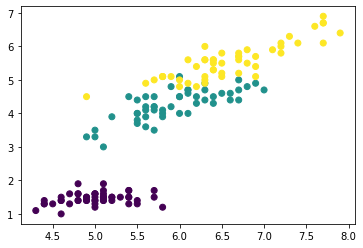

In [9]:
# код
plt.scatter(x='sepal_length', y='petal_length', data=frame, c='species_code');

Построим классификатор kNN для определения типа ириса:

In [71]:
X = frame[['sepal_length', 'petal_length']].values
y = frame.species_code.values

In [15]:
# X.shape, y.shape

In [16]:
knn = KNeighborsClassifier(3)
knn.fit(X, y)
knn

KNeighborsClassifier(n_neighbors=3)

In [18]:
frame['prediction'] = knn.predict(X)
frame[frame.species_code != frame.prediction].head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,prediction
72,6.3,2.5,4.9,1.5,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,1,2
106,4.9,2.5,4.5,1.7,virginica,2,1
126,6.2,2.8,4.8,1.8,virginica,2,1
138,6.0,3.0,4.8,1.8,virginica,2,1


Нарисуем "карту" влияний.

In [20]:
def plot_knn(knn, title='', xlabel='', ylabel=''):
    X = knn._fit_X
    y = knn._y
    
    x_low = X.min(axis=0)
    x_high = X.max(axis=0)
    x_d = x_high - x_low
        
    x_low -= 0.05 * x_d
    x_high += 0.05 * x_d
    
    X1 = np.linspace(x_low[0], x_high[0], 256)
    X2 = np.linspace(x_low[1], x_high[1], 256)
    
    X1, X2 = np.meshgrid(X1, X2)
    Z = np.column_stack([X1.flatten(), X2.flatten()])
    Z = knn.predict(Z)
    Z = Z.reshape(X1.shape)
    
    plt.figure(figsize=(7, 7))
    plt.contourf(X1, X2, Z, cmap='brg', levels=3, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Метод одного ближайшего соседа:

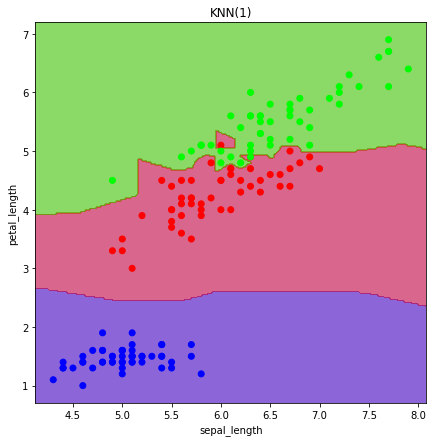

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
plot_knn(knn, 'KNN(1)', 'sepal_length', 'petal_length')

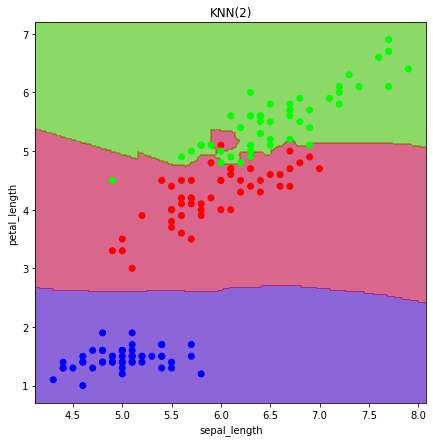

In [22]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)
plot_knn(knn, 'KNN(2)', 'sepal_length', 'petal_length')

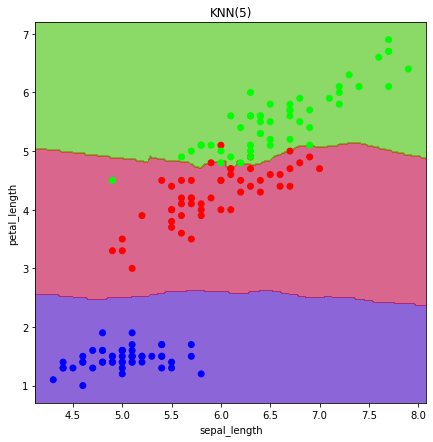

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
plot_knn(knn, 'KNN(5)', 'sepal_length', 'petal_length')

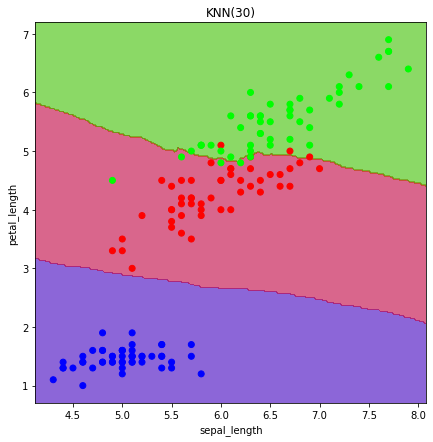

In [24]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X, y)
plot_knn(knn, 'KNN(30)', 'sepal_length', 'petal_length')

И снова интерактив:

In [25]:
output = wg.Output()

def func(k):
    with output:
        output.clear_output(wait=True)
        knn = KNeighborsClassifier(k)
        knn.fit(X, y)
        plot_knn(knn, f'KNN({k})', 'sepal_length', 'petal_length')
    
wg.interact(func,
            k=wg.IntSlider(min=1, max=50, value=5),
            continuous_update=False)
display(output)

interactive(children=(IntSlider(value=5, description='k', max=50, min=1), Output()), _dom_classes=('widget-int…

Output()

## 2.2. Взвешенный метод ближайших соседей

Метод $k$ __взвешенных__ ближайших соседей:
    $$w(i, u) = [i \le k] \cdot w_i, \quad a(u, \X) = \arg\max_{y \in Y} \sum_{i=1}^{k}[y_u^{(i)} = y] w_i.$$
    
Возможные подходы:

* Линейно убывающие веса: $$ w_i = \frac{k + 1 - i}{k}. $$
* Экспоненциально убывающие веса: $$ w_i = q^i, \quad 0 < q < 1. $$

__Задача:__ Реализовать функцию экспоненциальных весов.
* На вход: 
    * вектор расстояний длины $k$ (которые мы использовать не будем);
    * параметр $q$, значение по умолчанию $q=0.9$.
* На выход:
    * массив длины $k$ с весами $q^i, 1 \le i \le k$.

In [29]:
def exp_weights_func(distances, q=0.9):
    # код
    return q ** np.arange(1, distances.shape[0] + 1)

In [28]:
np.arange(1, 5+1)

array([1, 2, 3, 4, 5])

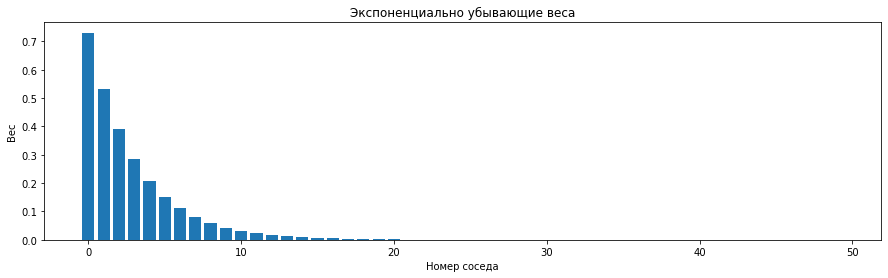

In [61]:
indices = np.arange(50)
weights = exp_weights_func(indices, 0.73)

plt.figure(figsize=(15, 4))
plt.bar(indices, weights)
plt.title('Экспоненциально убывающие веса')
plt.xlabel('Номер соседа')
plt.ylabel('Вес')
plt.show()

In [31]:
def exp_weights(distances):
    return np.array([exp_weights_func(row) for row in distances])

knn = KNeighborsClassifier(5, weights=exp_weights)
knn.fit(X, y)
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

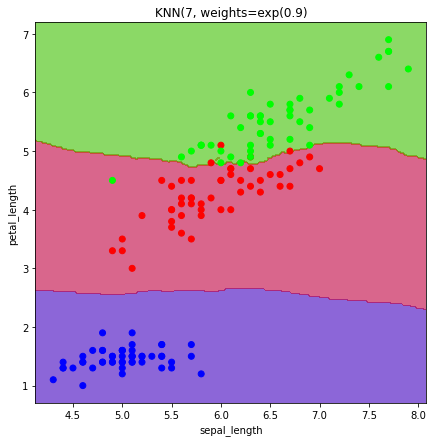

In [34]:
knn = KNeighborsClassifier(n_neighbors=7, weights=exp_weights)
knn.fit(X, y)
plot_knn(knn, 'KNN(7, weights=exp(0.9)', 'sepal_length', 'petal_length')

In [35]:
# обертка
def exp_weights(q):
    def func(d):
        return np.array([exp_weights_func(row, q) for row in d])
    return func

Интерактивчик:

In [36]:
output = wg.Output()

def func(k, q):
    with output:
        output.clear_output(wait=True)
        knn = KNeighborsClassifier(k, weights=exp_weights(q))
        knn.fit(X, y)
        plot_knn(knn, f'KNN({k}, weights=exp({q}))', 'sepal_length', 'petal_length')
    
wg.interact(func,
            k=wg.IntSlider(min=1, max=50, value=5),
            q=wg.FloatSlider(min=0.01, max=1.0, step=0.01, value=1.0),
            continuous_update=False)
display(output)

interactive(children=(IntSlider(value=5, description='k', max=50, min=1), FloatSlider(value=1.0, description='…

Output()

График весов:

In [37]:
output = wg.Output()

def func(q):
    with output:
        output.clear_output(wait=True)
        
        indices = np.arange(50)
        weights = exp_weights_func(indices, q)

        plt.figure(figsize=(15, 4))
        plt.bar(indices, weights)
        plt.title(f'Экспоненциально убывающие веса, q={q}')
        plt.xlabel('Номер соседа')
        plt.ylabel('Вес')
        plt.show()
    
wg.interact(func,
            q=wg.FloatSlider(min=0.01, max=1.0, step=0.01, value=1.0),
            continuous_update=False)
display(output)

interactive(children=(FloatSlider(value=1.0, description='q', max=1.0, min=0.01, step=0.01), Output()), _dom_c…

Output()

# 3. Регрессия

## 3.1. Метод $k$ ближайших соседей

* Классический: $$ w(i, u) = [i \le k], $$ $$ a(u, \X) = \frac{1}{k} \cdot \sum_{i=1}^k y_u^{(i)}. $$
* Общий вид (взвешенное среднее): $$a(u, \X) = \frac{\sum\limits_{i=1}^{\ell} w(i, u) \cdot  y_u^{(i)}}{\sum\limits_{i = 1}^{\ell} w(i, u)}.$$

Возможные подходы:

* Линейно убывающие веса: $$ w_i = \frac{k + 1 - i}{k}. $$
* Обратное расстояние: $$ w(i, u) = \frac{1}{\rho(u, x_u^{(i)})}. $$
* Экспоненциально убывающие веса: $$ w_i = q^i, \quad 0 < q < 1. $$

Размер X: (48,)
Размер y: (48,)


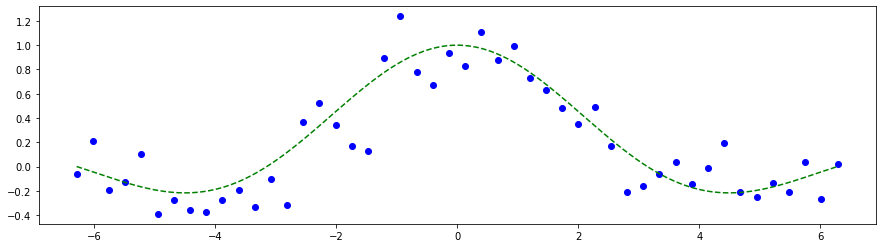

In [38]:
N = 48

def real_func(x):
    return np.sin(x) / x

X = np.linspace(-2 * np.pi, 2 * np.pi, N)
y = real_func(X) + np.random.normal(0, 0.2, size=N)

print('Размер X:', X.shape)
print('Размер y:', y.shape)

x_plt = np.linspace(-2 * np.pi, 2 * np.pi, 1024)
y_plt = real_func(x_plt)

plt.figure(figsize=(15, 4))
plt.scatter(X, y, color='blue')
plt.plot(x_plt, y_plt, color='green', linestyle='--')
plt.show()

In [40]:
X.shape

(48,)

In [42]:
X.reshape(-1, 1).shape

(48, 1)

Учим KNN:

In [43]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X.reshape(-1, 1), y)

KNeighborsRegressor(n_neighbors=1)

In [44]:
def plot_knn_reg(knn, title='', xlabel='X', ylabel='y'):
    x_plt = np.linspace(-2 * np.pi, 2 * np.pi, 1024)
    knn_plt = knn.predict(x_plt.reshape(-1, 1))
    
    plt.figure(figsize=(15, 4))
    plt.scatter(X, y, color='blue')
    plt.plot(x_plt, knn_plt, color='blue', lw=1)
    plt.plot(x_plt, y_plt, color='green', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

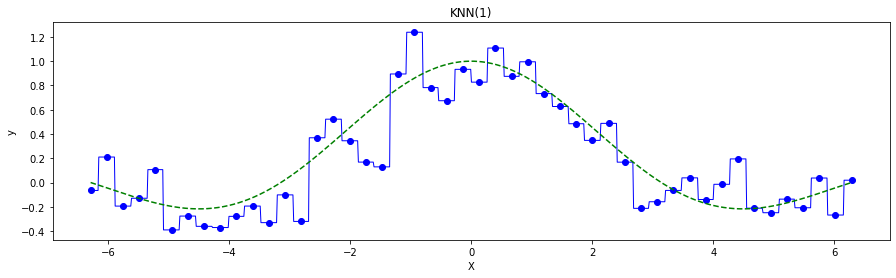

In [45]:
plot_knn_reg(knn, f'KNN(1)')

In [46]:
output = wg.Output()

def func(k):
    with output:
        output.clear_output(wait=True)
        knn = KNeighborsRegressor(k, )
        knn.fit(X.reshape(-1, 1), y)
        plot_knn_reg(knn, f'KNN({k})')
    
wg.interact(func,
            k=wg.IntSlider(min=1, max=N, value=5),
            continuous_update=False)
display(output)

interactive(children=(IntSlider(value=5, description='k', max=48, min=1), Output()), _dom_classes=('widget-int…

Output()

## 3.2. Метод $k$ взвешенных ближайших соседей

__Задача:__ реализовать функцию, возвращающую обратное расстояние.
* На входе:
    * массив расстояний distances;
* На выходе:
    * массив соответствующих весов для них.
    
__Предупреждение:__ Сумма весов должна быть равна 1.

In [53]:
def inv_dist_func(distances):
    # код
    inv = 1 / (distances + 1)
    return inv / sum(inv)

In [54]:
def inv_dist(distances):
    return np.array([inv_dist_func(row) for row in distances])

Посмотрим, как это выглядит:

In [55]:
output = wg.Output()

def func(k):
    with output:
        output.clear_output(wait=True)
        knn = KNeighborsRegressor(k, weights=inv_dist)
        knn.fit(X.reshape(-1, 1), y)
        plot_knn_reg(knn, f'KNN({k}, weights=inv_dist)')
    
wg.interact(func,
            k=wg.IntSlider(min=1, max=N, value=5),
            continuous_update=False)
display(output)

interactive(children=(IntSlider(value=5, description='k', max=48, min=1), Output()), _dom_classes=('widget-int…

Output()

Посмотрим теперь экспонециальное взвешивание:

In [56]:
def reg_exp_weights_func(distances, q=0.9):
    # код
    return q ** np.arange(1, distances.shape[0]+1)

In [57]:
def reg_exp_weights(q):
    def func(d):
        return np.array([reg_exp_weights_func(row, q) for row in d])
    return func

In [59]:
output = wg.Output()

def func(k, q):
    with output:
        output.clear_output(wait=True)
        knn = KNeighborsRegressor(k, weights=reg_exp_weights(q))
        knn.fit(X.reshape(-1, 1), y)
        plot_knn_reg(knn, f'KNN({k}, weights=exp({q}))')
    
wg.interact(func,
            k=wg.IntSlider(min=1, max=48, value=5),
            q=wg.FloatSlider(min=0.01, max=1.0, step=0.01, value=1.0),
            continuous_update=False)
display(output)

interactive(children=(IntSlider(value=5, description='k', max=48, min=1), FloatSlider(value=1.0, description='…

Output()

In [63]:
frame.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,prediction
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [75]:
X.shape

(150, 2)

In [72]:
X = frame[['sepal_length', 'petal_length']].values
y = frame.species_code.values

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [105]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [106]:
y_pred = knn.predict(X_test)

In [107]:
y_test == y_pred

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False])

In [109]:
# Accuracy
np.mean(y_test == y_pred)

0.8666666666666667

# 4. Упражнения

__Задача 1:__ Реализовать метод $k$ ближайших соседей для регрессии и классификации с нуля.

In [ ]:
class HandmadeKNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    # на вход: 
    # X -- матрица признаков, np.array, shape (N, d)
    # y -- массив ответов, np.array, shape (N,)
    # на выход:
    # self -- объект класса
    # этот метод уже реализован
    def fit(self, X, y):
        self._fit_X = X.copy()
        self._y = y.copy()
        return self
        
    # на вход: 
    # X -- матрица признаков, np.array, shape (N, d)
    # на выход:
    # y -- массив меток, np.array, shape (N,)
    def predict(self, X):
        # реализуйте этот метод
        return np.zeros(X.shape[0])

In [ ]:
# проверка
X = frame[['sepal_length', 'sepal_width']].values
y = frame['species_code'].values

k = 6

knn = HandmadeKNNClassifier(n_neighbors=k)
knn.fit(X, y)

plot_knn(knn, f'HandmadeKNN({k})', 'sepal_length', 'petal_length')

knn_gt = KNeighborsClassifier(n_neighbors=k)
knn_gt.fit(X, y)
if not (knn.predict(X) == knn_gt.predict(X)).min():
    print('Ответы не совпадают с KNeighborsClassifier из sklearn')
else:
    print('Успех!')

In [ ]:
class HandmadeKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    # на вход: 
    # X -- матрица признаков, np.array, shape (N, d)
    # y -- массив ответов, np.array, shape (N,)
    # на выход:
    # self -- объект класса
    # этот метод уже реализован
    def fit(self, X, y):
        self._fit_X = X.copy()
        self._y = y.copy()
        return self
        
    # на вход: 
    # X -- матрица признаков, np.array, shape (N, d)
    # на выход:
    # y -- массив меток, np.array, shape (N,)
    def predict(self, X):
        # реализуйте этот метод
        return np.zeros(X.shape[0])

In [ ]:
# проверка
N = 48
def real_func(x):
    return np.sin(x) / x

X = np.linspace(-2 * np.pi, 2 * np.pi, N)
y = real_func(X) + np.random.normal(0, 0.2, size=N)
X = X.reshape(-1, 1)

k = 7

knn = HandmadeKNNRegressor(n_neighbors=k)
knn.fit(X, y)

plot_knn_reg(knn, f'HandmadeKNN({k})')

knn_gt = KNeighborsRegressor(n_neighbors=k)
knn_gt.fit(X, y)

if not (knn.predict(X) == knn_gt.predict(X)).min():
    print('Ответы не совпадают с KNeighborsRegressor из sklearn')
else:
    print('Успех!')